In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
#from utility import check_columns


# Import .csv
file = 'Resources/Working_Population_Pct.csv'
file_df = pd.read_csv(file, index_col=False)
file_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,WKGPOP,TOT,PC_POP,A,2009,67.505,NaN
1,AUS,WKGPOP,TOT,PC_POP,A,2010,67.386,NaN
2,AUS,WKGPOP,TOT,PC_POP,A,2011,67.226,NaN
3,AUS,WKGPOP,TOT,PC_POP,A,2012,66.930,NaN
4,AUS,WKGPOP,TOT,PC_POP,A,2013,66.671,NaN


In [2]:
country_df=file_df.replace({'LOCATION': {'AUS':'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 
                             'CAN': 'Canada', 'CZE': 'Czech Republic', 'DNK': 'Denmark',
                             'FIN': 'Finland', 'FRA': 'France',  'DEU': 'Germany',                           
                             'GRC': 'Greece', 'HUN': 'Hungary',  'ISL': 'Iceland',
                             'IRL': 'Ireland', 'ITA': 'Italy', 'JPN': 'Japan',
                             'KOR': 'Korea','LUX': 'Luxembourg', 'MEX': 'Mexico', 
                             'NLD': 'Netherlands',  'NZL': 'New Zealand', 'NOR': 'Norway',
                             'POL': 'Poland','PRT': 'Portugal','SVK': 'Slovak Republic',
                             'SVN': 'Slovenia','ESP': 'Spain','SWE': 'Sweden', 'GBR': 'United Kingdom',
                             'TUR': 'Turkey',  'USA': 'United States','CHE': 'Sitzerland',
                             'CHL': 'Chile', 'EST': 'Estonia','ISR': 'Israel',
                             'LVA': 'Latvia', 'LTU': 'Lithuania'}
                            })

country_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,Australia,WKGPOP,TOT,PC_POP,A,2009,67.505,NaN
1,Australia,WKGPOP,TOT,PC_POP,A,2010,67.386,NaN
2,Australia,WKGPOP,TOT,PC_POP,A,2011,67.226,NaN
3,Australia,WKGPOP,TOT,PC_POP,A,2012,66.930,NaN
4,Australia,WKGPOP,TOT,PC_POP,A,2013,66.671,NaN


In [3]:
working_df=country_df[['LOCATION','Value']]
#working_df.head()
working_df.rename(columns={'LOCATION': 'Country', 'Value': 'GDP'}, inplace=True)
working_df.head()

C:\Users\Elizabeth Conway\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,GDP
0,Australia,67.505
1,Australia,67.386
2,Australia,67.226
3,Australia,66.930
4,Australia,66.671


In [4]:
working_df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Sitzerland',
       'Turkey', 'United Kingdom', 'United States', 'BRA', 'Chile', 'COL',
       'Estonia', 'Israel', 'RUS', 'Slovenia', 'OECD', 'EU28', 'Latvia',
       'ARG', 'BGR', 'CHN', 'CRI', 'HRV', 'CYP', 'IND', 'IDN',
       'Lithuania', 'MLT', 'ROU', 'SAU', 'SGP', 'ZAF', 'WLD', 'G20'],
      dtype=object)

In [5]:
#working_df.

group_df=(working_df.groupby(['Country'])).mean()
group_df.head()

,GDP
Country,
ARG,64.0044
Australia,66.5498
Austria,67.3097
BGR,66.6991
BRA,68.8306


<AxesSubplot:xlabel='Country'>

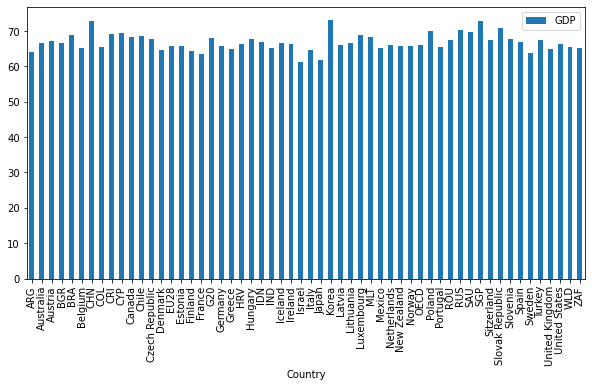

In [6]:
group_df.plot(kind='bar',figsize=(10,5))

In [7]:
west = ['United Kingdom', 'Spain', 'Austria', 'France', 'Germany', 'Ireland', 'Switzerland', 'Italy', 'Luxembourg', 'Greece', 'Israel'
                 'Netherlands', 'Belgium', 'Australia', 'New Zealand', 'Portugal', 'Turkey', 'Canada']
east =  ['Estonia', 'Czech Republic', 'Latvia', 'Lithuania', 'Hungary', 'Slovak Republic', 'Slovenia', 'Poland'] 
scandinavian = ['Norway', 'Finland' ,'Iceland', 'Sweden', 'Denmark']
us = ['United States']
asia = ['Korea', 'Japan']
latin = ['Mexico', 'Chile']

In [8]:
west_df = pd.DataFrame({"Country": west})
east_df = pd.DataFrame({"Country": east})
scand_df = pd.DataFrame({"Country": scandinavian})
us_df = pd.DataFrame({"Country": us})
asia_df = pd.DataFrame({"Country": asia})
latin_df = pd.DataFrame({"Country": latin})

In [12]:
west_filter = pd.merge(group_df, west_df, on=["Country"])
east_filter = pd.merge(group_df, east_df, on=["Country"])
scand_filter = pd.merge(group_df, scand_df, on=["Country"])
us_filter = pd.merge(group_df, us_df, on=["Country"])
asia_filter = pd.merge(group_df, asia_df, on=["Country"])
latin_filter = pd.merge(group_df, latin_df, on=["Country"])

region_df = {
    "west": {"df": west_filter},
    "east": {"df": east_filter},
    "scand": {"df":scand_filter},
    "us": {"df":us_filter},
    "asia": {"df":asia_filter},
    "latin": {"df":latin_filter}
}

In [10]:
#region_df.plot(kind='bar',figsize=(10,5))

AttributeError: 'dict' object has no attribute 'plot'

NameError: name 'df' is not defined

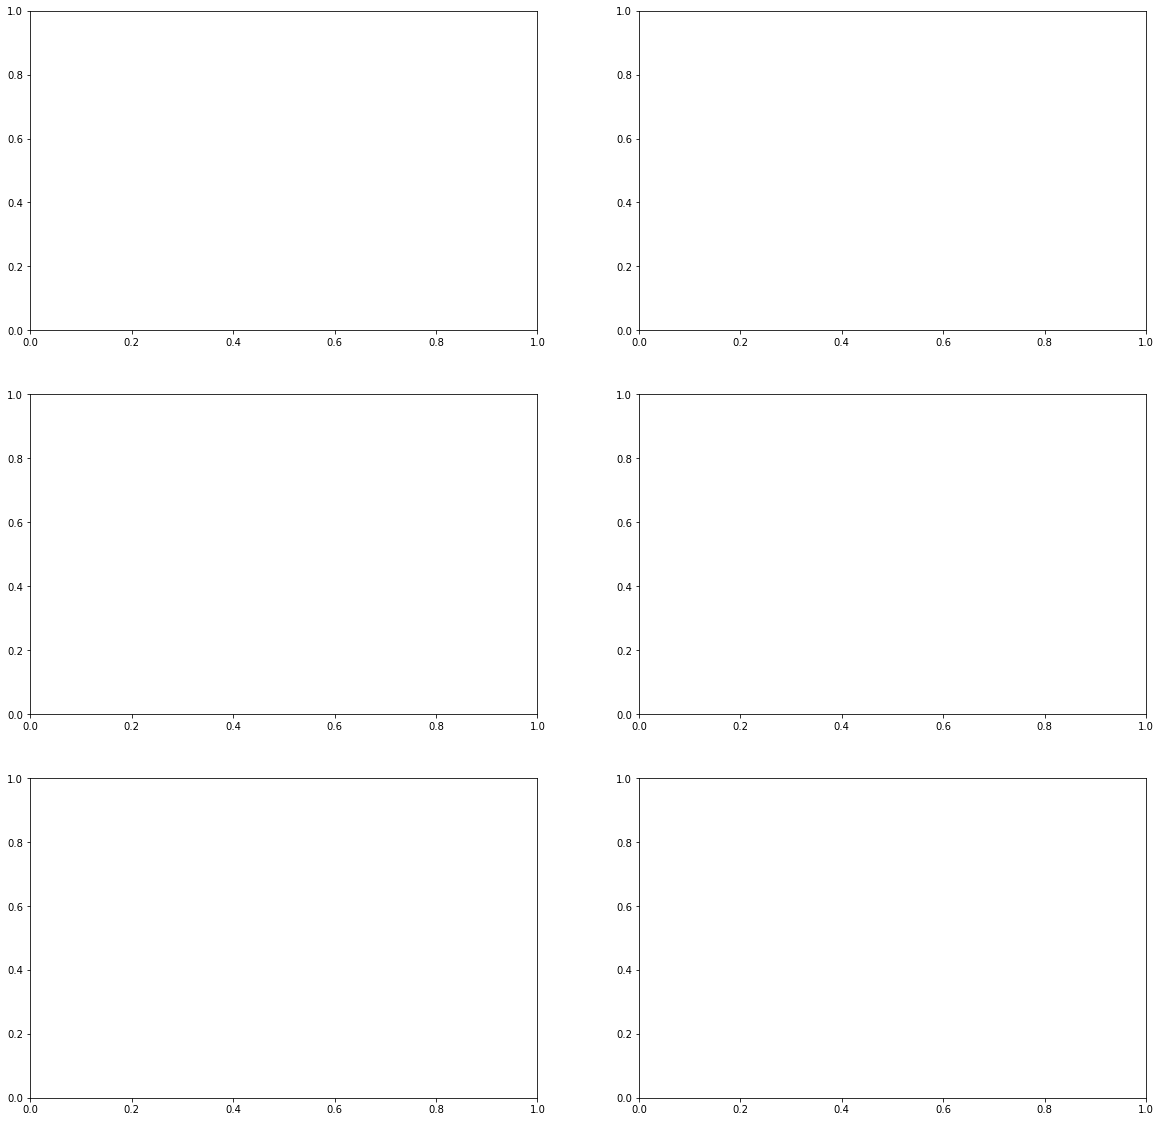

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

for region in df:
    x_position=df[region]["x"]
    y_position=df[region]["y"]
    region_df.plot.bar(x="Country", y="GDP", ax=ax[x_position][y_position], grid=True)
    ax[x_position][y_position].set_title(region)
    ax[x_position][y_position].set_ylim(50, 75)
    #ax[x_position][y_position].set_xlim(0, 100)
    
    x = df[region]["df"]["Country"]
    y = df[region]["df"]["GDP"]
    #(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    #regress_values = x * slope + intercept
    #line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    #ax[x_position][y_position].plot(x, regress_values, "r-")
    
    #ax[x_position][y_position].annotate(region, (70,0.5), fontsize=16, color="darkblue")
    #ax[x_position][y_position].annotate(line_eq, (70,0.45), fontsize=16, color="darkblue")
    #ax[x_position][y_position].annotate(f"rvalue: {round(rvalue,2)}", (70,0.4), fontsize=16, color="darkblue")